In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.stats as stats
import xgboost as xgb


from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout

2024-07-17 18:09:43.162628: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 18:09:43.186840: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 18:09:43.191355: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 18:09:43.214132: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-17 18:09:44.196429: W tensorflow/compiler/tf2

In [4]:
file_path = "../raw_data/Dataset.csv"
df = pd.read_csv(file_path)
df.head(100)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.00,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.50,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.00,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,58.18,0,1.0,0.0,-2.43,1,0,9891
96,1,1,119.0,98.0,NaN,137.0,87.00,NaN,NaN,NaN,...,NaN,NaN,58.18,0,1.0,0.0,-2.43,2,0,9891
97,2,2,120.0,97.0,NaN,151.0,95.00,NaN,NaN,NaN,...,NaN,NaN,58.18,0,1.0,0.0,-2.43,3,0,9891
98,3,3,116.0,97.0,36.0,153.0,84.33,NaN,NaN,NaN,...,NaN,NaN,58.18,0,1.0,0.0,-2.43,4,0,9891


In [5]:
df.Patient_ID.value_counts()

Patient_ID
3658      336
114471    336
101922    336
117406    336
4905      336
         ... 
110085      8
16854       8
118844      8
16161       8
109559      8
Name: count, Length: 40336, dtype: int64

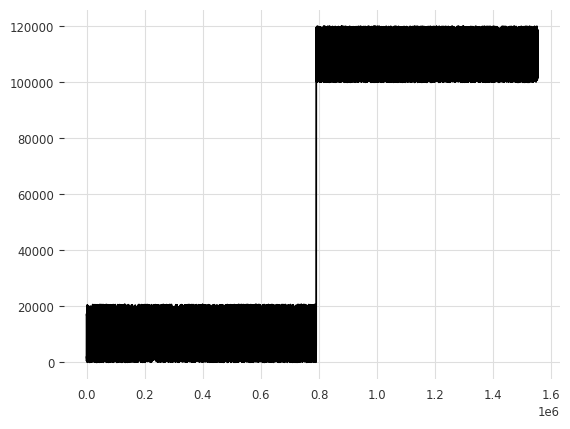

In [6]:
plt.plot(df.Patient_ID)

In [7]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Bilirubin_direct    0.998074
Fibrinogen          0.993402
TroponinI           0.990477
Bilirubin_total     0.985092
Alkalinephos        0.983932
AST                 0.983776
Lactate             0.973299
PTT                 0.970559
SaO2                0.965494
EtCO2               0.962868
Phosphate           0.959863
HCO3                0.958106
Chloride            0.954603
BaseExcess          0.945790
PaCO2               0.944401
Calcium             0.941161
Platelets           0.940595
Creatinine          0.939044
Magnesium           0.936896
WBC                 0.935932
BUN                 0.931344
pH                  0.930697
Hgb                 0.926176
FiO2                0.916658
Hct                 0.911460
Potassium           0.906891
Glucose             0.828943
Temp                0.661627
Unit2               0.394251
Unit1               0.394251
DBP                 0.313459
Resp                0.153546
SBP                 0.145770
O2Sat               0.130611
MAP           

In [8]:
features = df.columns.tolist()
features

['Unnamed: 0',
 'Hour',
 'HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'EtCO2',
 'BaseExcess',
 'HCO3',
 'FiO2',
 'pH',
 'PaCO2',
 'SaO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Calcium',
 'Chloride',
 'Creatinine',
 'Bilirubin_direct',
 'Glucose',
 'Lactate',
 'Magnesium',
 'Phosphate',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'Hct',
 'Hgb',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel',
 'Patient_ID']

In [9]:
#features to drop in the dataset

columns_drop = ['Unnamed: 0','EtCO2','BaseExcess', 'HCO3','pH','PaCO2','Alkalinephos', 'Calcium','Magnesium',
  'Phosphate','Potassium','PTT','Fibrinogen','Unit1','Unit2']

columns_for_baseline = ['Hour', 'HR','O2Sat', 'Temp','SBP', 'MAP', 'DBP', 'Resp', 'EtCO2','Age','Gender','Patient_ID','SepsisLabel']

In [10]:
df1 = df[columns_for_baseline]
df1.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,17072,0
1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,68.54,0,17072,0
2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,68.54,0,17072,0
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,68.54,0,17072,0
4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,68.54,0,17072,0


In [11]:
df1.bfill().ffill()
df1.head(50)

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0,17072,0
1,1,65.0,100.0,NaN,NaN,72.00,NaN,16.5,NaN,68.54,0,17072,0
2,2,78.0,100.0,NaN,NaN,42.50,NaN,NaN,NaN,68.54,0,17072,0
3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,68.54,0,17072,0
4,4,70.0,100.0,NaN,129.0,74.00,69.0,14.0,NaN,68.54,0,17072,0
5,5,62.0,100.0,NaN,124.0,85.00,61.0,14.0,NaN,68.54,0,17072,0
6,6,61.0,100.0,NaN,101.0,75.00,58.0,14.0,NaN,68.54,0,17072,0
7,7,68.0,100.0,35.78,142.0,93.50,78.0,16.0,NaN,68.54,0,17072,0
8,8,71.0,100.0,NaN,121.0,74.00,91.0,14.0,NaN,68.54,0,17072,0
9,9,69.0,100.0,NaN,120.0,79.00,98.0,14.0,NaN,68.54,0,17072,0


In [12]:
(df1.isnull().sum()/len(df1)).sort_values(ascending=False)

EtCO2          0.962868
Temp           0.661627
DBP            0.313459
Resp           0.153546
SBP            0.145770
O2Sat          0.130611
MAP            0.124513
HR             0.098826
Hour           0.000000
Age            0.000000
Gender         0.000000
Patient_ID     0.000000
SepsisLabel    0.000000
dtype: float64

In [14]:
(df1['SepsisLabel'].value_counts()/len(df1)).sort_values(ascending=False)

SepsisLabel
0    0.982015
1    0.017985
Name: count, dtype: float64

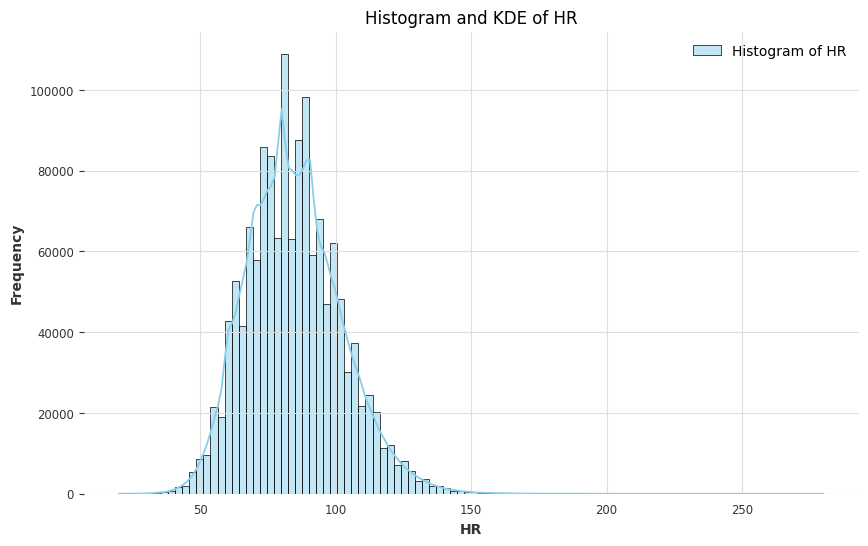

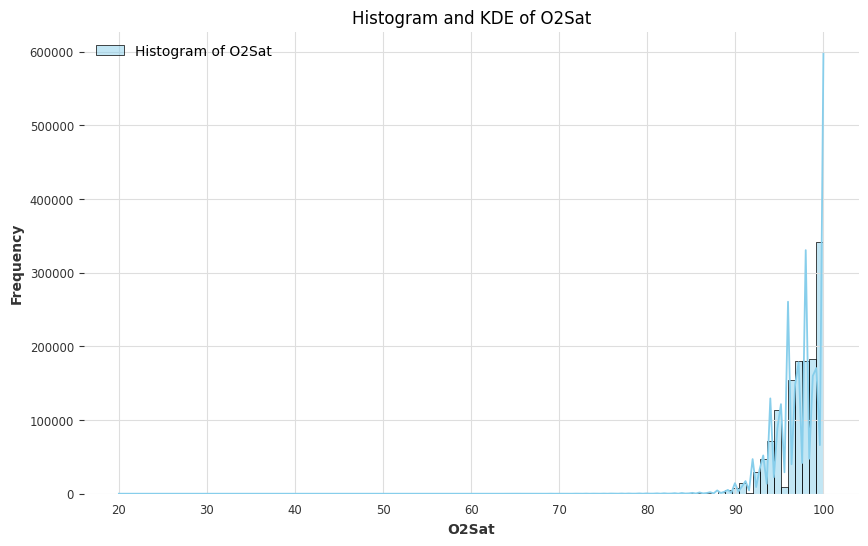

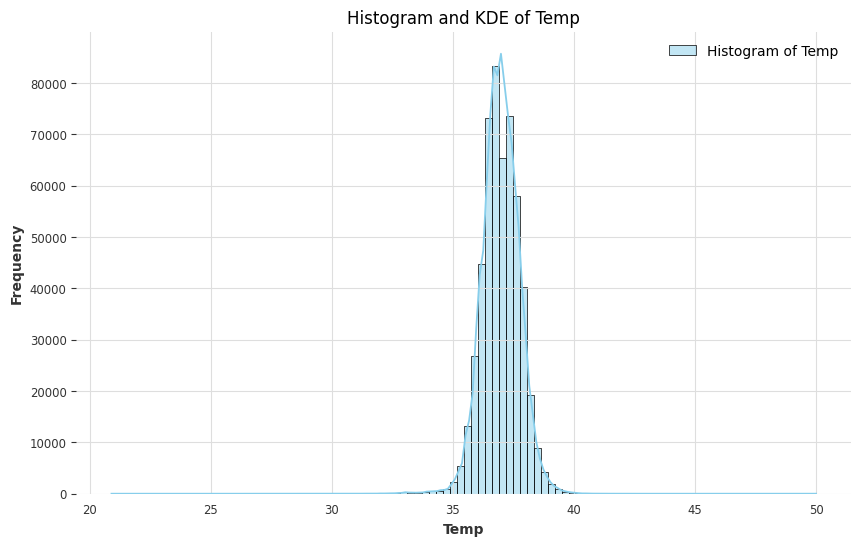

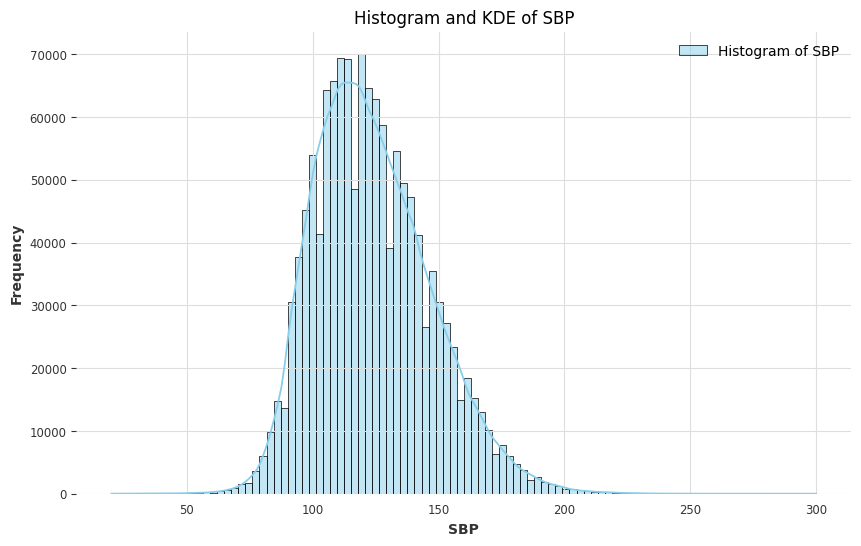

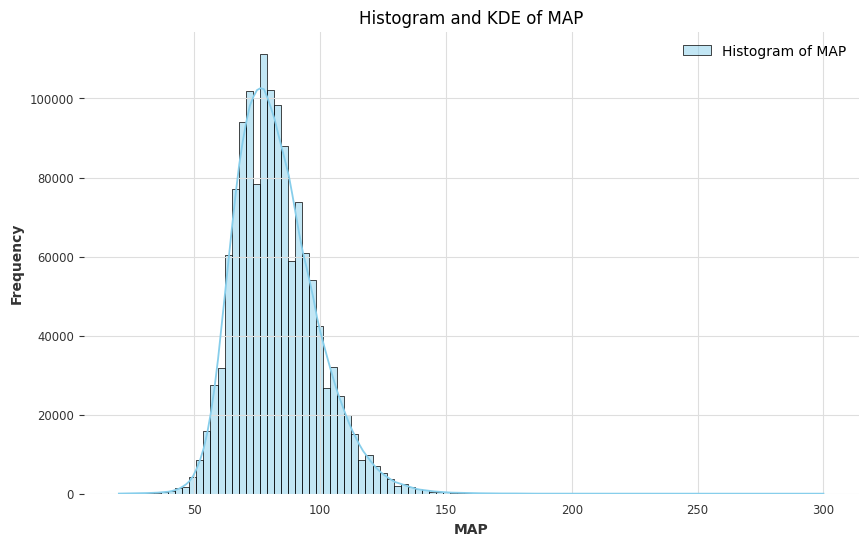

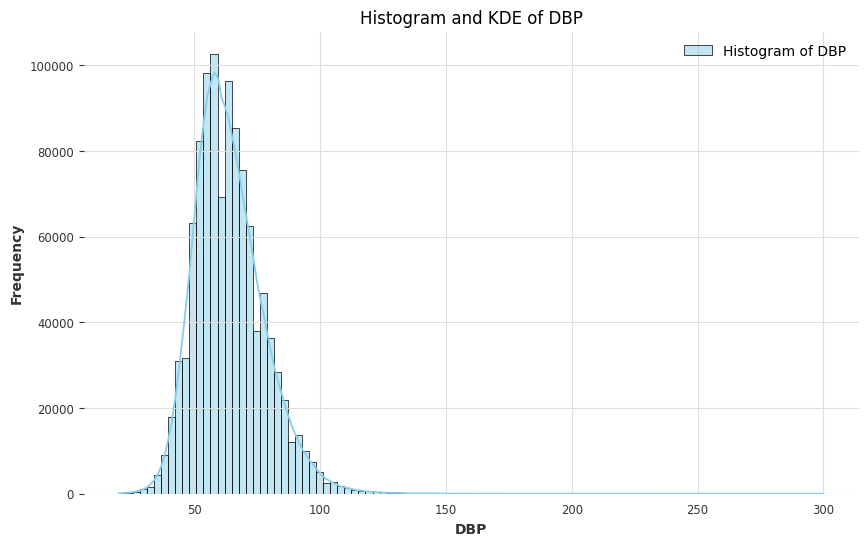

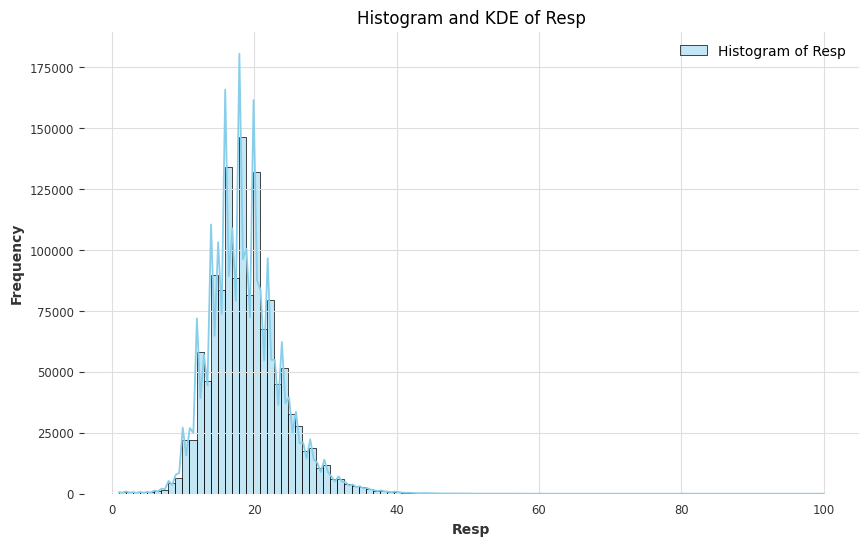

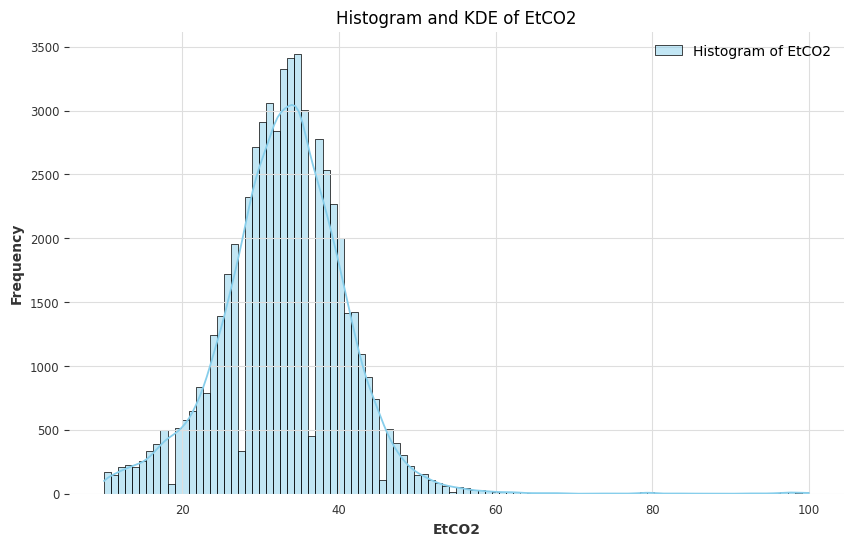

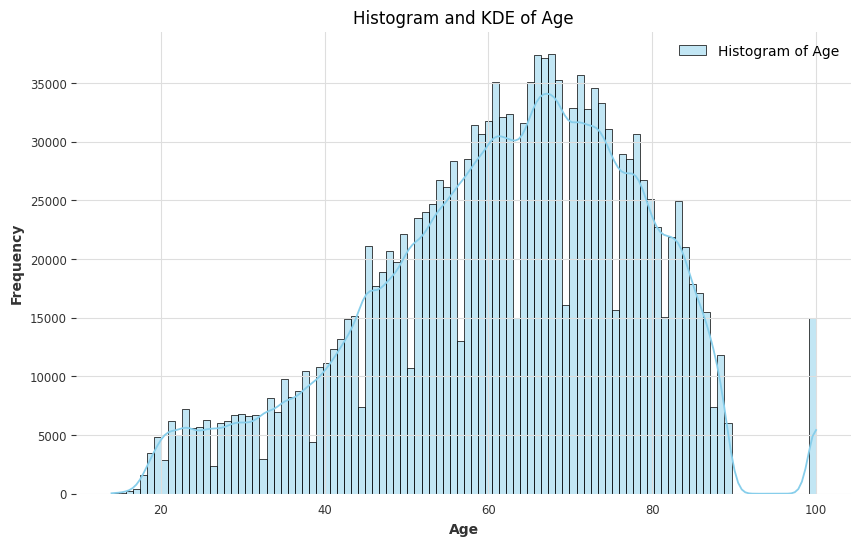

In [15]:
# List of columns to plot
columns_to_scale = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'Age']

# Plot histograms with KDE for each variable
for column in columns_to_scale:
    plt.figure(figsize=(10, 6))

    # Create histogram with KDE for the variable
    sns.histplot(df1[column], kde=True, bins=100, color='skyblue', label=f'Histogram of {column}')

    # Adding labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram and KDE of {column}')
    plt.legend()
    plt.show()

# After checking the histograms we can see that:

-'HR' has normal distribution

-'O2Sat' is not normal and is squeeed to the right

-'Temp' is normal

-'SBP' is normal

-'MAP' is normal

-'DBP' is normal

-'Resp' is normal

-'EtCO2' is weird

-'Age' is normal squeeded to the right

In [ ]:
"""# Initialize the scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply MinMaxScaler to the O2Sat column
df_encoded['O2Sat'] = min_max_scaler.fit_transform(df_encoded[['O2Sat']])

# Apply StandardScaler to the rest of the columns
columns_to_standardize = [col for col in columns_to_scale if col != 'O2Sat']
df_encoded[columns_to_standardize] = standard_scaler.fit_transform(df_encoded[columns_to_standardize])"""

In [16]:
(df1['SepsisLabel'].value_counts()/len(df1)).sort_values(ascending=False)

SepsisLabel
0    0.982015
1    0.017985
Name: count, dtype: float64

In [17]:
sepsis_patients_ids = list(set(df1.loc[df1['SepsisLabel'] == 1, 'Patient_ID'].tolist()))


In [18]:
# Get unique Patient_IDs from df_encoded
all_patient_ids = set(df1['Patient_ID'])
# Find Patient_IDs not in sepsis_patients_ids
no_sepsis_patients_ids = list(all_patient_ids - set(sepsis_patients_ids))

In [19]:
import random
non_sepsis_selected_patients_ids = random.sample(no_sepsis_patients_ids, 4000)

In [20]:
non_sepsis_selected_df = df1.loc[df1['Patient_ID'].isin(non_sepsis_selected_patients_ids)]
sepsis_selected_df = df1.loc[df1['Patient_ID'].isin(sepsis_patients_ids)]

In [21]:
final_df = pd.concat([non_sepsis_selected_df,sepsis_selected_df])
final_df.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
481,0,88.0,100.0,34.60,114.50,90.0,71.50,10.0,NaN,60.42,0,1380,0
482,1,88.0,100.0,34.90,116.00,91.0,75.00,10.0,NaN,60.42,0,1380,0
483,2,88.0,100.0,36.05,112.75,85.5,71.50,11.0,NaN,60.42,0,1380,0
484,3,88.0,99.5,36.90,113.00,89.5,76.25,12.5,NaN,60.42,0,1380,0
485,4,87.0,100.0,37.00,107.50,88.0,77.00,13.0,NaN,60.42,0,1380,0


In [4]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2']

df1['O2Sat'] = min_max_scaler.fit_transform(df1[['O2Sat']])

df1[features] = standard_scaler.fit_transform(df1[features])


X = df1[['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2']]
y = df1["SepsisLabel"]


NameError: name 'df1' is not defined

In [25]:
patient_ids = final_df['Patient_ID'].unique()
patient_ids_shuffled = np.random.shuffle(patient_ids)


In [26]:
# Split the data into training and testing sets, we have 5545 patients for train and 1386 for test so a total of 1386 + 5545 = 6931 patients
split_point = int(0.8 * len(patient_ids))  # 80% train, 20% test
split_point

5545

In [27]:
train_ids = patient_ids[:split_point]
test_ids = patient_ids[split_point:]

In [28]:
train_df = final_df.loc[final_df['Patient_ID'].isin(train_ids)]
test_df = final_df.loc[final_df['Patient_ID'].isin(test_ids)]

In [29]:
train_df.head(50)

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
2031,0,91.0,100.0,35.94,133.0,116.00,98.0,17.5,NaN,52.23,0,16190,0
2032,1,94.0,100.0,NaN,128.0,118.50,103.0,17.0,NaN,52.23,0,16190,0
2033,2,94.0,NaN,37.39,151.0,104.00,95.0,15.0,NaN,52.23,0,16190,0
2034,3,95.0,100.0,NaN,127.0,101.00,111.0,17.0,NaN,52.23,0,16190,0
2035,4,93.0,100.0,NaN,135.0,110.00,111.0,26.0,NaN,52.23,0,16190,0
2036,5,90.0,97.0,NaN,94.0,89.00,80.0,16.0,NaN,52.23,0,16190,0
2037,6,88.0,97.0,NaN,103.0,87.00,80.0,15.0,NaN,52.23,0,16190,0
2038,7,87.0,98.0,NaN,111.0,92.00,79.0,15.0,NaN,52.23,0,16190,0
2039,8,96.0,99.0,37.28,136.0,93.00,82.0,19.0,NaN,52.23,0,16190,0
2040,9,91.0,100.0,NaN,NaN,112.00,NaN,20.0,NaN,52.23,0,16190,0


In [30]:
test_df

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender,Patient_ID,SepsisLabel
481,0,88.0,100.0,34.60,114.50,90.0,71.50,10.0,NaN,60.42,0,1380,0
482,1,88.0,100.0,34.90,116.00,91.0,75.00,10.0,NaN,60.42,0,1380,0
483,2,88.0,100.0,36.05,112.75,85.5,71.50,11.0,NaN,60.42,0,1380,0
484,3,88.0,99.5,36.90,113.00,89.5,76.25,12.5,NaN,60.42,0,1380,0
485,4,87.0,100.0,37.00,107.50,88.0,77.00,13.0,NaN,60.42,0,1380,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544614,69,86.0,100.0,NaN,108.00,73.0,54.00,24.0,NaN,73.00,1,108042,1
1544615,70,80.0,100.0,38.50,119.00,79.0,58.00,24.0,26.5,73.00,1,108042,1
1544616,71,80.0,95.0,NaN,115.00,77.0,57.00,24.0,NaN,73.00,1,108042,1
1544617,72,80.0,95.0,NaN,115.00,77.0,57.00,24.0,NaN,73.00,1,108042,1


In [31]:
X_train = train_df.drop('SepsisLabel',axis=1)
y_train = train_df['SepsisLabel']

In [32]:
X_test = test_df.drop('SepsisLabel',axis=1)
y_test = test_df['SepsisLabel']


In [33]:
X_train.set_index(['Patient_ID'], inplace=True)
X_train.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender
Patient_ID,,,,,,,,,,,
16190,0,91.0,100.0,35.94,133.0,116.0,98.0,17.5,NaN,52.23,0
16190,1,94.0,100.0,NaN,128.0,118.5,103.0,17.0,NaN,52.23,0
16190,2,94.0,NaN,37.39,151.0,104.0,95.0,15.0,NaN,52.23,0
16190,3,95.0,100.0,NaN,127.0,101.0,111.0,17.0,NaN,52.23,0
16190,4,93.0,100.0,NaN,135.0,110.0,111.0,26.0,NaN,52.23,0


In [34]:
X_test.set_index(['Patient_ID'], inplace=True)
X_test.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Age,Gender
Patient_ID,,,,,,,,,,,
1380,0,88.0,100.0,34.60,114.50,90.0,71.50,10.0,NaN,60.42,0
1380,1,88.0,100.0,34.90,116.00,91.0,75.00,10.0,NaN,60.42,0
1380,2,88.0,100.0,36.05,112.75,85.5,71.50,11.0,NaN,60.42,0
1380,3,88.0,99.5,36.90,113.00,89.5,76.25,12.5,NaN,60.42,0
1380,4,87.0,100.0,37.00,107.50,88.0,77.00,13.0,NaN,60.42,0


In [3]:
model = Sequential([
    LSTM(units=32, return_sequences=True, input_shape=(None, len(features))),  # Reduced units
    Dropout(0.2),
    LSTM(units=32, return_sequences=False),  # Reduced units
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: name 'features' is not defined

In [1]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

NameError: name 'model' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict on test data
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy:.2%}')